<a href="https://colab.research.google.com/github/Iamjuhwan/DATASCIENCE_PROJECTS/blob/main/Decision_Trees_and_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"

In [3]:
!wget $data -O CreditScoring.csv

--2025-07-03 15:44:45--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2025-07-03 15:44:45 (1.25 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [5]:
df = pd.read_csv("CreditScoring.csv")
display(df.head())

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
df.status

,status
0,1
1,1
2,2
3,1
4,1
...,...
4450,2
4451,1
4452,2
4453,1


In [9]:
df.status.value_counts()

,count
status,
1,3200
2,1254
0,1


In [10]:
df.status.map({1: 'ok', 2: 'default', 0: 'unk'})

,status
0,ok
1,ok
2,default
3,ok
4,ok
...,...
4450,default
4451,ok
4452,default
4453,ok


In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [12]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
  }

df.status = df.status.map(status_values)

In [13]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'priv',
    4: 'ignore',
    5: 'parents',
    6: 'other'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced'
}

records_values = {
    1: 'no_rec',
    2: 'yes_rec'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others'
}

df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

display(df.head())

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [15]:
df.income.replace(to_replace=99999999, value=np.nan)

,income
0,129.0
1,131.0
2,200.0
3,182.0
4,107.0
...,...
4450,92.0
4451,75.0
4452,90.0
4453,140.0


In [16]:
df.income.replace(to_replace=99999999, value=np.nan).max()

959.0

In [17]:
for c in ['income', 'assets', 'debt']:
  df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [18]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [19]:
df.status.value_counts()

,count
status,
ok,3200
default,1254
unk,1


In [20]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [23]:
df_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
951,default,10,owner,36,36,married,no_rec,freelance,75,0.0,10000.0,0.0,1000,1400
688,default,6,parents,48,32,single,yes_rec,fixed,35,85.0,0.0,0.0,1100,1330
2233,ok,1,parents,48,40,married,no_rec,fixed,75,121.0,0.0,0.0,1320,1600
3304,default,1,parents,48,23,single,no_rec,partime,35,72.0,0.0,0.0,1078,1079
2271,ok,5,owner,36,46,married,no_rec,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,ok,18,priv,36,45,married,no_rec,fixed,45,220.0,20000.0,0.0,800,1600
1784,ok,7,priv,60,29,married,no_rec,fixed,60,51.0,3500.0,500.0,1000,1290
808,ok,1,parents,24,19,single,no_rec,fixed,35,28.0,0.0,0.0,400,600
1857,ok,15,owner,48,43,married,no_rec,freelance,60,100.0,18000.0,0.0,2500,2976


In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

## remove default variable from the dataframe

In [26]:
del df_train['status']
del df_val['status']
del df_test['status']

In [27]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no_rec,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes_rec,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no_rec,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no_rec,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no_rec,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,priv,36,45,married,no_rec,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,priv,60,29,married,no_rec,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no_rec,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no_rec,freelance,60,100.0,18000.0,0.0,2500,2976


# Decision Trees


1.   How a decision tree look like
2.   Training a decision tree
3.   Overfitting
4.   Controlling the size of the tree



In [28]:
def assess_risk(client):
  if client['records'] == 'yes':
    if client['job'] == 'parttime':
      return 'default'
    else:
      return 'ok'
  else:
    if client['assets'] > 6000:
      return 'ok'
    else:
      return 'default'

In [29]:
df_train.iloc[0].to_dict

<bound method Series.to_dict of seniority           10
home             owner
time                36
age                 36
marital        married
records         no_rec
job          freelance
expenses            75
income             0.0
assets         10000.0
debt               0.0
amount            1000
price             1400
Name: 0, dtype: object>

In [30]:
xi = df_train.iloc[0].to_dict()

In [31]:
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no_rec',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [32]:
assess_risk(xi)

'ok'

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [34]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [35]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [36]:
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [37]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home',
       'home=ignore', 'home=other', 'home=owner', 'home=parents',
       'home=priv', 'home=rent', 'income', 'job', 'job=fixed',
       'job=freelance', 'job=others', 'job=partime', 'marital',
       'marital=divorced', 'marital=married', 'marital=separated',
       'marital=single', 'marital=widow', 'price', 'records=no_rec',
       'records=yes_rec', 'seniority', 'time'], dtype=object)

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [40]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [41]:
roc_auc_score(y_val, y_pred)

np.float64(0.6529388970962196)

In [42]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

it leads to overfitting

In [43]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('test:', auc)

train: 0.7761016984958594
test: 0.7389079944782155


In [45]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no_rec <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no_rec >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## Decision Tree Parameter tuning

selecting max_depth
selecting min samples leaf


In [46]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.761
  10 -> 0.689
  15 -> 0.655
  20 -> 0.660
None -> 0.653


In [47]:
for d in [4, 5, 6]:
  for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
    dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s %4s -> %.3f' % (d, s, auc))

   4    1 -> 0.761
   4    2 -> 0.761
   4    5 -> 0.761
   4   10 -> 0.761
   4   15 -> 0.764
   4   20 -> 0.761
   4  100 -> 0.756
   4  200 -> 0.747
   4  500 -> 0.680
   5    1 -> 0.767
   5    2 -> 0.767
   5    5 -> 0.768
   5   10 -> 0.762
   5   15 -> 0.773
   5   20 -> 0.774
   5  100 -> 0.763
   5  200 -> 0.759
   5  500 -> 0.680
   6    1 -> 0.754
   6    2 -> 0.750
   6    5 -> 0.762
   6   10 -> 0.778
   6   15 -> 0.785
   6   20 -> 0.774
   6  100 -> 0.776
   6  200 -> 0.768
   6  500 -> 0.680


In [48]:
scores = []

for d in [4, 5, 6]:
  for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
    dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((d, s, auc))

In [49]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [50]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
22,6,15,0.785250
21,6,10,0.778299
24,6,100,0.776434
14,5,20,0.774028
23,6,20,0.773337
13,5,15,0.772142
25,6,200,0.768267
11,5,5,0.767755
9,5,1,0.766938
10,5,2,0.766496


In [51]:
df_scores.pivot(index= 'min_samples_leaf', columns='max_depth', values='auc')

max_depth,4,5,6
min_samples_leaf,,,
1,0.761283,0.766938,0.749022
2,0.761283,0.766496,0.762648
5,0.761283,0.767755,0.759636
10,0.761283,0.761809,0.778299
15,0.763726,0.772142,0.785250
20,0.760910,0.774028,0.773337
100,0.755937,0.763384,0.776434
200,0.747260,0.759073,0.768267
500,0.679842,0.679842,0.679842


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

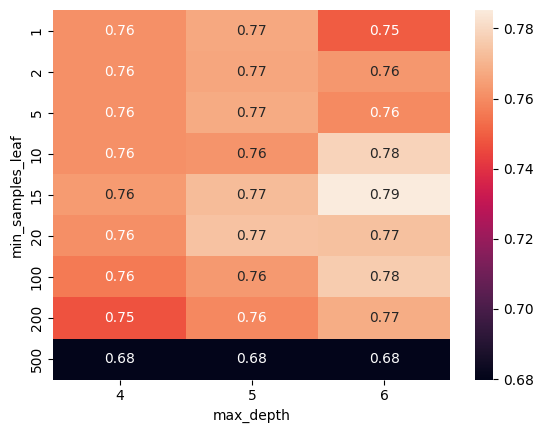

In [52]:
sns.heatmap(df_scores.pivot(index= 'min_samples_leaf', columns='max_depth', values='auc'), annot=True)

In [53]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# Ensemble and random forest


*   Board of experts
*   Ensembling Model
*   Random forest
*   Tuning random forest





In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [55]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [56]:
roc_auc_score(y_val, y_pred)

np.float64(0.7957908503063621)

In [57]:
scores = []

for n in range(10, 201, 10):
  rf = RandomForestClassifier(n_estimators=n, random_state=1)
  rf.fit(X_train, y_train)


  y_pred = rf.predict_proba(X_val)[:, 1]
  auc = roc_auc_score(y_val, y_pred)

  scores.append((n, auc))


In [58]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores.head()

,n_estimators,auc
0,10,0.787593
1,20,0.801876
2,30,0.809783
3,40,0.813101
4,50,0.813422


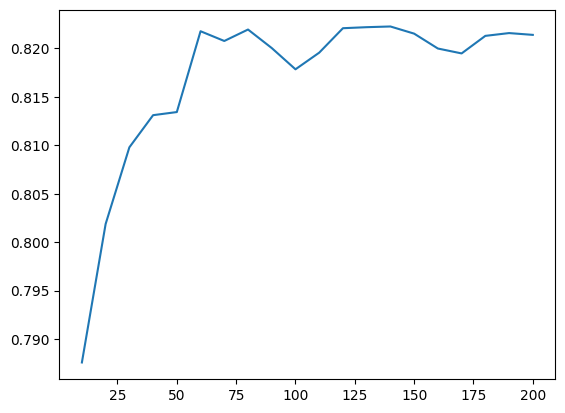

In [59]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.show()

In [60]:

scores == []

for d in [5, 10, 15]:
  for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((d, n, auc))


In [61]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,10,0.787593,NaN
1,20,0.801876,NaN
2,30,0.809783,NaN
3,40,0.813101,NaN
4,50,0.813422,NaN


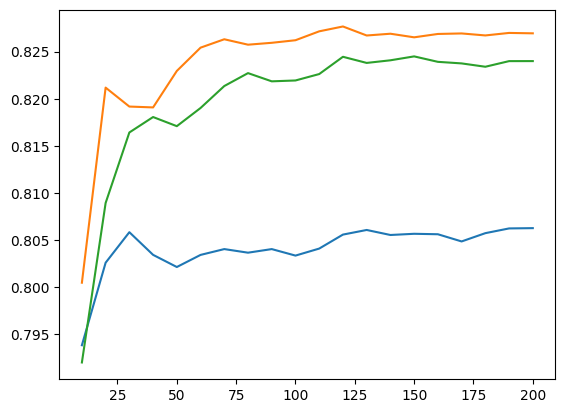

In [62]:
for d in [5, 10, 15]:
  df_plot = df_scores[df_scores.max_depth == d]
  plt.plot(df_plot.n_estimators, df_plot.auc, label='depth=%s' % d)

In [63]:
max_depth = 10

In [64]:
for s in [1, 3, 5, 10, 50]:
  for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((s, n, auc))

In [65]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,10,0.787593,NaN
1,20,0.801876,NaN
2,30,0.809783,NaN
3,40,0.813101,NaN
4,50,0.813422,NaN


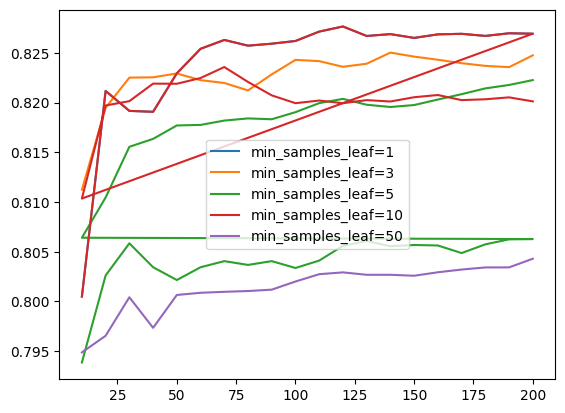

In [66]:
colors = ['black']

for s in [1, 3, 5, 10, 50]:
  df_plot = df_scores[df_scores.min_samples_leaf == s]
  plt.plot(df_plot.n_estimators, df_plot.auc, label='min_samples_leaf=%s' % s)

plt.legend()

## Gradient Boosting

In [67]:
import xgboost as xgb

In [68]:
features = dv.get_feature_names_out().tolist()

dtrain =  xgb.DMatrix(X_train, label= y_train, feature_names=features)

dval = xgb.DMatrix(X_val, label= y_val, feature_names=features)

In [69]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

model

In [70]:
y_pred = model.predict(dval)

In [71]:
roc_auc_score(y_val, y_pred)


np.float64(0.8186378387542078)

In [72]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [74]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [75]:
model

In [76]:
print(output.stdout)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.90325	val-auc:0.79290
[10]	train-auc:0.91874	val-auc:0.80510
[15]	train-auc:0.93126	val-auc:0.81380
[20]	train-auc:0.93873	val-auc:0.81804
[25]	train-auc:0.94638	val-auc:0.82065
[30]	train-auc:0.95338	val-auc:0.82063
[35]	train-auc:0.95874	val-auc:0.82404
[40]	train-auc:0.96325	val-auc:0.82644
[45]	train-auc:0.96694	val-auc:0.82602
[50]	train-auc:0.97195	val-auc:0.82549
[55]	train-auc:0.97475	val-auc:0.82648
[60]	train-auc:0.97708	val-auc:0.82781
[65]	train-auc:0.97937	val-auc:0.82775
[70]	train-auc:0.98214	val-auc:0.82681
[75]	train-auc:0.98315	val-auc:0.82728
[80]	train-auc:0.98517	val-auc:0.82560
[85]	train-auc:0.98721	val-auc:0.82503
[90]	train-auc:0.98840	val-auc:0.82443
[95]	train-auc:0.98972	val-auc:0.82389
[100]	train-auc:0.99061	val-auc:0.82456
[105]	train-auc:0.99157	val-auc:0.82359
[110]	train-auc:0.99224	val-auc:0.82274
[115]	train-auc:0.99288	val-auc:0.82147
[120]	train-auc:0.99378	val-auc:0.82154
[125]	train-auc:0.9948

In [77]:
s = output.stdout

In [78]:
print(s)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.90325	val-auc:0.79290
[10]	train-auc:0.91874	val-auc:0.80510
[15]	train-auc:0.93126	val-auc:0.81380
[20]	train-auc:0.93873	val-auc:0.81804
[25]	train-auc:0.94638	val-auc:0.82065
[30]	train-auc:0.95338	val-auc:0.82063
[35]	train-auc:0.95874	val-auc:0.82404
[40]	train-auc:0.96325	val-auc:0.82644
[45]	train-auc:0.96694	val-auc:0.82602
[50]	train-auc:0.97195	val-auc:0.82549
[55]	train-auc:0.97475	val-auc:0.82648
[60]	train-auc:0.97708	val-auc:0.82781
[65]	train-auc:0.97937	val-auc:0.82775
[70]	train-auc:0.98214	val-auc:0.82681
[75]	train-auc:0.98315	val-auc:0.82728
[80]	train-auc:0.98517	val-auc:0.82560
[85]	train-auc:0.98721	val-auc:0.82503
[90]	train-auc:0.98840	val-auc:0.82443
[95]	train-auc:0.98972	val-auc:0.82389
[100]	train-auc:0.99061	val-auc:0.82456
[105]	train-auc:0.99157	val-auc:0.82359
[110]	train-auc:0.99224	val-auc:0.82274
[115]	train-auc:0.99288	val-auc:0.82147
[120]	train-auc:0.99378	val-auc:0.82154
[125]	train-auc:0.9948

In [79]:
line = s.split('\n')[0]


In [80]:
line.split('\t')

['[0]', 'train-auc:0.86730', 'val-auc:0.77938']

In [81]:
num_iter, train_auc, val_auc = line.split('\t')

In [82]:
num_iter

'[0]'

In [83]:
int(num_iter.strip('[]'))

0

In [84]:
float(train_auc.split(':')[1])

0.8673

In [85]:
float(val_auc.split(':')[1])

0.77938

In [87]:
def parse_xgb_output(s):
  results = []

  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')

    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])

    results.append((it, train, val))

  columns = ['num_iter', 'train_auc', 'val_auc']
  df_results = pd.DataFrame(results, columns=columns)

  return df_results



In [88]:
parse_xgb_output(output)

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.90325,0.79290
2,10,0.91874,0.80510
3,15,0.93126,0.81380
4,20,0.93873,0.81804
5,25,0.94638,0.82065
6,30,0.95338,0.82063
7,35,0.95874,0.82404
8,40,0.96325,0.82644
9,45,0.96694,0.82602


In [89]:
df_score = parse_xgb_output(output)

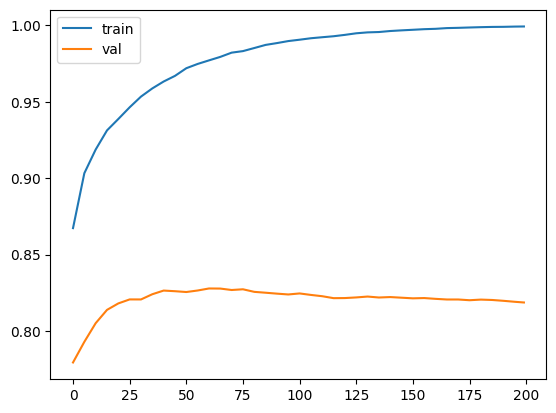

In [90]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

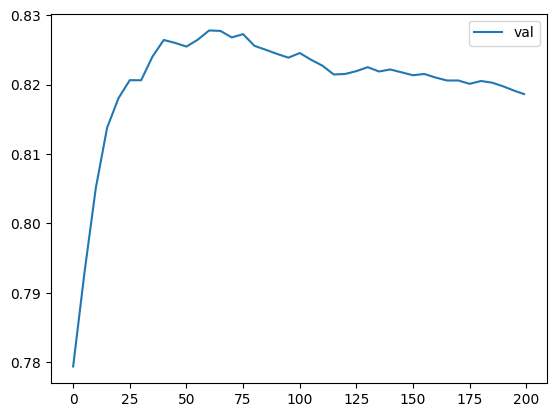

In [91]:

plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## Xgboost Tuning

In [92]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [97]:
scores = {}

In [98]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [99]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.90325,0.79290
2,10,0.91874,0.80510
3,15,0.93126,0.81380
4,20,0.93873,0.81804
5,25,0.94638,0.82065
6,30,0.95338,0.82063
7,35,0.95874,0.82404
8,40,0.96325,0.82644
9,45,0.96694,0.82602


In [95]:
df_score = parse_xgb_output(output.stdout)
df_score = pd.DataFrame(df_score, columns=['num_iter', 'train_auc', 'val_auc'])
display(df_score.head())

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.90325,0.79290
2,10,0.91874,0.80510
3,15,0.93126,0.81380
4,20,0.93873,0.81804


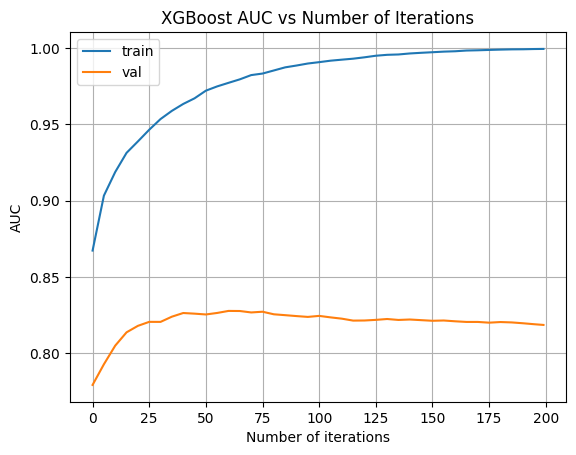

In [96]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.xlabel('Number of iterations')
plt.ylabel('AUC')
plt.title('XGBoost AUC vs Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no_rec,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no_rec,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no_rec,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no_rec,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no_rec,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no_rec,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no_rec,fixed,45,101.0,0.0,0.0,1300,1333
4023,ok,2,parents,36,25,single,no_rec,fixed,35,110.0,0.0,0.0,500,1200
3775,ok,4,other,60,25,single,no_rec,fixed,35,162.0,0.0,0.0,1800,2999


In [101]:
df_full_train = df_full_train.reset_index(drop=True)

In [102]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no_rec,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no_rec,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no_rec,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no_rec,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no_rec,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,default,4,owner,60,47,married,no_rec,freelance,75,0.0,13500.0,0.0,1900,1976
3559,ok,2,rent,60,28,single,no_rec,fixed,45,101.0,0.0,0.0,1300,1333
3560,ok,2,parents,36,25,single,no_rec,fixed,35,110.0,0.0,0.0,500,1200
3561,ok,4,other,60,25,single,no_rec,fixed,35,162.0,0.0,0.0,1800,2999


In [103]:
y_full_train = (df_full_train.status == 'default').astype('int').values

In [104]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [105]:
del df_full_train['status']

In [106]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)



In [110]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names_out().tolist())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out().tolist())

In [111]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1


}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [112]:
y_pred = model.predict(dtest)

In [113]:
roc_auc_score(y_test, y_pred)

np.float64(0.827378915986511)